**CSE 5522 Lab 1: Submission by Cedric Fausey**

**CSE 5522 Lab #1: Regression**

The goals of this lab are to familarize you with:

*   Gradient descent
*   Multivariate regression
*   Logistic regression
*   Data exploration

**Initial notes**

* (If you are using Google Colab) Make a copy of this page in your google drive so that you can edit it.

* While not completely necessary for this assignment, you may want to familiarize yourself with the following packages: [numpy](https://numpy.org), [scikit-learn](https://scikit-learn.org), [pandas](https://pandas.pydata.org), [matplotlib](https://matplotlib.org).
 * Especially numpy, many of the calculations in this lab (and later) can be done in one line using numpy. Whereas raw python may require 5-10x that.

* Feel free to (please do!) change the structure of the document below. Especially, add code sections to break your code into logical pieces and add text sections to explain your code or results

---
---



**Part 1: Multivariate regression (20 pts)**

In this part of the lab, you'll explore multivariate regression.  We'll use the *scikit-learn* linear regression tool (although you're welcome to extend your code from the hands-on).  The primary reason for this is that the sklearn routines will handle some of the normalization issues for you.

Note: Some parts of this tutorial were based on [Argawal, Linear Regression on Boston Housing Dataset](https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155).

**1.0:** We'll be looking at the Boston Housing dataset which is built in to sklearn, but has more variables. Load the dataset in:

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
boston_dataset=load_boston()

**1.1** You can see a description of the dataset by printing the dataset's DESCR attribute (set by the sklearn.dataset package).

In [ ]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

**1.2:** We can convert this data into a pandas dataframe and then look at the first few rows in tabular form.

In [ ]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV']=boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**1.3:** At this point, we want to figure out what variables are good predictors of the median value of a house in Boston.  We can find the relationship between single variables by looking at the correlation between variables.  

---

*Side note: the correlation between two vectors of variables x and y is* 
```
1/(n-1) sum x*y
```
*assuming that x and y have zero mean and a standard gaussian distribution (which you can achieve by subtracting the mean and dividing by the standard deviation).  If x and y always share the same sign, then this value will be positive; if x and y are always opposite sign then the correlation is negative.*

---

The sklearn.datasets class has a built in correlation function, which we can use to compute the correlation between each pair of variables.  We can also use the seaborn package to plot a nice heatmap of these variables.

**What's the most correlated variable with MEDV?**


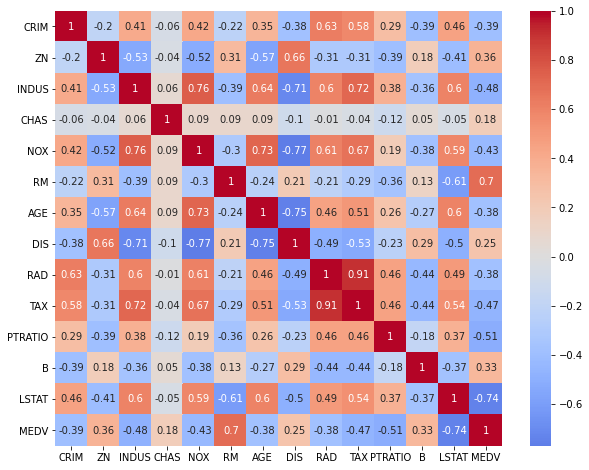

In [ ]:
import seaborn as sb

correlation_matrix = boston.corr().round(2)
plt.figure(figsize=(10,8))
sb.heatmap(data=correlation_matrix, annot=True, center=0.0, cmap='coolwarm')

Note that the most correlated variable is LSTAT (at -0.74) and not RM (0.70) - while the correlation is negative, it just means that there is an inverse relationship between LSTAT and MEDV (when LSTAT goes up, MEDV goes down), but LSTAT should be the single best predictor.

**1.4:** Now, we kind of cheated there, since we figured out the correlation on the entire dataset.  A better practice is to randomly select training and test sets, fit the data on the training set, and then evaluate on the test set.  Let's see if LSTAT really is a better predictor than RM of MEDV.

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# first, set up dataframe for all variables 
boston_totaldata = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston_totaltarget = boston_dataset.target

boston_traindata, boston_testdata, boston_traintarget, boston_testtarget = train_test_split(boston_totaldata,
                                                                                           boston_totaltarget,
                                                                                           test_size=0.2,
                                                                                           random_state=5)
#"random_state" sets the random seed used when dividing the datasets. Setting it to a fixed number like this means
#we will get the same "random" split every time. If you truly want random, remove this argument

In [ ]:
boston_traindata.shape

(404, 13)

In [ ]:
boston_testdata.shape

(102, 13)

In [ ]:
# subselect LSTAT data, train model
#   note the double square brackets - need 2-dimensional array to come out of selection
lstat_traindata=boston_traindata[['LSTAT']]
lstat_testdata=boston_testdata[['LSTAT']]
lin_model = LinearRegression()
lin_model.fit(lstat_traindata,boston_traintarget)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lstat_testpredict=lin_model.predict(lstat_testdata)
rmse = (np.sqrt(mean_squared_error(boston_testtarget,lstat_testpredict)))
r2 = r2_score(boston_testtarget,lstat_testpredict)
print('Test RMSE = {}, Test R2 = {}'.format(rmse,r2))

Test RMSE = 6.2307165730986815, Test R2 = 0.5041523728903132


*Note:* We do no normalizing here because sklearn will do it for us, if necessary

R2 is the amount of variation explained by the model, and can range from 0 (no variance explained) to 1 (perfect explanation). 

*Something for you to think about:* Notice that R2 is much lower than the correlation coefficient.  Why? (There are 2 reasons.)

**1.4a:** Let's do it again for RM (this time, you calculate it).

In [4]:
# Copy and modify the example above to predict using RM (instead of LSTAT)
# Of course, also calculate RMSE and R2 for the new prediction
rm_traindata=boston_traindata[['RM']]
rm_testdata=boston_testdata[['RM']]
lin_model = LinearRegression()
lin_model.fit(rm_traindata,boston_traintarget)
rm_testpredict=lin_model.predict(rm_testdata)
rmse = (np.sqrt(mean_squared_error(boston_testtarget,rm_testpredict)))
r2 = r2_score(boston_testtarget,rm_testpredict)
print('Test RMSE = {}, Test R2 = {}'.format(rmse,r2))

Test RMSE = 4.895963186952216, Test R2 = 0.6938399401553497


(Note: answers for why R2 is lower that correlation is that (a) it's roughly the square of correlation, and also (b) we calculated correlation on the entire training set; R2 was calculated on test only.)

**1.5:** At this point, you can start to look at how to predict from multiple variables.  What are the two best variables in predicting as measured by R2? (Try every possible variable pair.)

Are the results better than predicting using all variables?

**Answer:** The best pair of variables is RM and TAX (average number of rooms and tax rate), with R2 equal to about 0.7499. The results here are slightly better than predicting using all variables.

In [ ]:
# Rebuild your previous training method to do two variable/feature prediction.
# Loop over and train models for every possible pair 
for feature1 in boston_dataset.feature_names:
  for feature2 in boston_dataset.feature_names:
    features_traindata = boston_traindata[[feature1, feature2]].to_numpy().reshape(-1,2)
    features_testdata = boston_testdata[[feature1, feature2]].to_numpy().reshape(-1,2)
    lin_model = LinearRegression()
    lin_model.fit(features_traindata, boston_traintarget)
    features_testpredict = lin_model.predict(features_testdata)
    rmse = (np.sqrt(mean_squared_error(boston_testtarget,features_testpredict)))
    r2 = r2_score(boston_testtarget,features_testpredict)
    print('Features {} and {}, Test RMSE = {}, Test R2 = {}'.format(feature1, feature2, rmse, r2))

---
---
**Part 2: Predicting Gene Expression (40 pts)**

There are ~20,000 genes in the human genome. Each one of them is transcribed to mRNA and then translated to proteins which carry on various tasks inside our body. We can measure the amount of 20,000 mRNA expressed in samples collected from different organs. This collection is called _gene expression profile_.

Although our genome is the same across all cell types, the gene expression profile is different because each organ needs different proteins for its survival. One of the regulatory mechanisms which controls the expression level in each cell type is microRNA (miR). MicroRNAs are small molecules which attach to mRNAs and prevent them from translation to proteins and also degrade them.

So if miR A targets mRNA B when A increases B decreases. Our goal is to predict mRNA levels (gene expression profile) using 21 miR features. Note that each of the 20,000 expression levels can be a response of regression with 21 features. To simplify, we have selected a few genes to predict their expression.

Your job will be to investigate how well the miR values predict the mRNA values.  

You are recommended to use the sklearn.linear_model package to conduct linear regression experiments, but you may use other packages if you wish.  

**Instructions:** Load the data from GitHub (example code given). 

**Hint:** Part 1 of this lab (Boston Housing) has examples of how to do almost everything you need for this part. Please review it carefully.

In [ ]:
miR_URL='https://raw.githubusercontent.com/efosler/cse5522data/master/miRScore-x.csv'
miR_df=pd.read_csv(miR_URL)
# remove row names from the first column, rows=samples, cols=miR features
miR = np.array(miR_df)[:,1:]

mRNA_well_URL='https://raw.githubusercontent.com/efosler/cse5522data/master/mRNA-y-well-explained.csv'
mRNA_well_df=pd.read_csv(mRNA_well_URL)
# remove label column, transpose with rows=samples, cols=mRNA
mRNA_well = np.transpose(np.array(mRNA_well_df)[:,1:8896])

mRNA_poor_URL='https://raw.githubusercontent.com/efosler/cse5522data/master/mRNA-y-poor-explained.csv'
mRNA_poor_df=pd.read_csv(mRNA_poor_URL)
# remove label column, transpose with rows=samples, cols=mRNA
mRNA_poor = np.transpose(np.array(mRNA_poor_df)[:,1:8896])

You should randomly divide the samples into 80/20 training/test splits, and repeat the experiment 10 times to give mean and standard deviation of the metrics.

**2.1:** Using the *miR* features, predict each of the well-expressed (*mRNA_well*) and poorly-expressed (*mRNA_poor*) genes with a linear model. This means you will be solving 55 separate linear regression problems (one each for 35 well-expressed + 20 poorly expressed).

Perform 10 experiments of the above using a different training/test split each time. Report the the mean and standard deviation (over the 10 experiments) for each of the 55 mRNA targets for both the R2 and RMSE metrics.

*Note:* This means in total you will be building/training 550 different models!

In [ ]:
from statistics import mean, pstdev
rmseList = {}
r2List = {}

def genePredict(df, feature_train, feature_test, target_train, target_test):
    for j in range(len(df["Unnamed: 0"])):
      geneName = df["Unnamed: 0"][j]
      lin_model = LinearRegression()
      lin_model.fit(feature_train, target_train[:, j])
      miR_testpredict = lin_model.predict(feature_test)
      rmse = (np.sqrt(mean_squared_error(target_test[:, j],miR_testpredict)))
      r2 = r2_score(target_test[:, j],miR_testpredict)
      addToList(rmseList, geneName, rmse)
      addToList(r2List, geneName, r2)
      # print("{},{},{},{}".format(targetName, geneName, rmse, r2))
      # print('{}-expressed Gene {}, Test RMSE = {}, Test R2 = {}'.format(targetName, df["Unnamed: 0"][j], rmse, r2))

# adds a value to a gene's list of RMSE or R2 values, used to make standard deviation and mean straightforward to calculate
def addToList(list1, gene, value):
  if gene not in list1:
    list1[gene] = []
  list1[gene].append(value)

def wellOrPoor(gene):
  if gene in mRNA_well_df["Unnamed: 0"].values:
    return "Well"
  elif gene in mRNA_poor_df["Unnamed: 0"].values:
    return "Poor"
  else:
    return "n/a"

# prints top row of the table
print("Gene Type,Gene Name,RMSE Mean,RMSE St Dev,R2 Mean, R2 St Dev")
for i in range(10):
  miR_train, miR_test, mRNA_well_train, mRNA_well_test, mRNA_poor_train, mRNA_poor_test = train_test_split(miR,
                                                                                          mRNA_well, mRNA_poor,
                                                                                          test_size=0.2)
  genePredict(mRNA_well_df, miR_train, miR_test, mRNA_well_train, mRNA_well_test)
  genePredict(mRNA_poor_df, miR_train, miR_test, mRNA_poor_train, mRNA_poor_test)

for gene in rmseList:
  print("{},{},{},{},{},{}".format(wellOrPoor(gene), gene, mean(rmseList[gene]), pstdev(rmseList[gene]), mean(r2List[gene]), pstdev(r2List[gene])))

Gene Type,Gene Name,RMSE Mean,RMSE St Dev,R2 Mean, R2 St Dev
Well,SNORD88B,0.0,0.0,1.0,0.0
Well,GRHL2,1.0387013590349465,0.02216012184266805,0.89244023957591,0.004066903937162877
Well,C1orf172,0.7583639369029277,0.02115278940855865,0.8773211499400269,0.006428283742913001
Well,RAB25,1.2023021332332193,0.027915489159955186,0.8751313228263295,0.005170013146236
Well,ANKS4B,0.8306099741253457,0.028164001830966835,0.8631745939173133,0.008149328649483504
Well,HNF4A,1.185462799790596,0.029556793861501007,0.8617878884100807,0.008075480020459243
Well,AP1M2,1.1870059589250381,0.05078265654081353,0.8465177136439128,0.015304362579087342
Well,PKP3,1.2684225099495836,0.021867943106062254,0.8443885641366977,0.007620597431015781
Well,STMN4,0.7910741410353688,0.02954980899710423,0.8376510751793328,0.010654754788697499
Well,ESRP1,1.2596892401349737,0.022549445579317092,0.8412846259014514,0.007157706635896363
Well,CDHR5,1.300587293856839,0.03969174056535332,0.8308472229205953,0.010810050794281715
Well,MEG

The code above outputs text that can easily be put into a .csv file, showing the mean and standard deviation of each gene's RMSE and R2 respectively.

A quick summary:
* Mean RMSE is generally higher well-expressed than poorly-expressed, although both vary heavily.
* Standard deviation RMSE is about the same average in both categories, but the poorly-expressed ones vary more.
* Mean R2 is consistently much higher well-expressed than poorly-expressed, with no outliers and very little variance.
* Standard deviation R2 is the same situation as standard RMSE: about the same average in both categories, but the poorly-expressed ones vary more.

**2.2:** Visualize and compare the performance of the well expressed gene set to the poorly expressed gene set using R2.  Draw histograms of the R2s for both sets on the same plot; one histogram comparison should be done for train and one for test. (matplotlib has builtin histogram-drawing functions, see the documentation.)

Describe the differences you see across the well and poorly expressed gene sets.

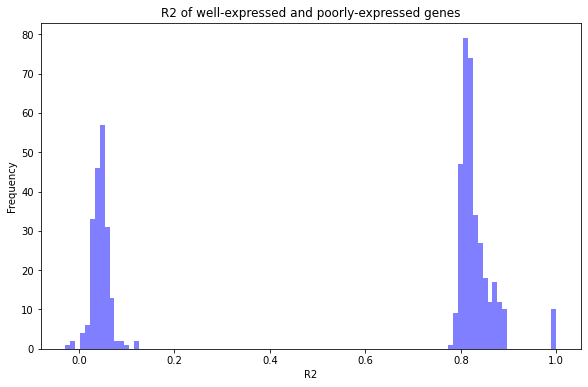

In [ ]:
num_bins = 100
allR2s = []

# adds every single R2 value to the list, not just the means
for gene in r2List:
  allR2s += r2List[gene]

f = plt.figure() 
f.set_figwidth(10) 
f.set_figheight(6) 

n, bins, patches = plt.hist(allR2s, num_bins, facecolor = "blue", alpha = 0.5)

plt.xlabel("R2")
plt.ylabel("Frequency")
plt.title("R2 of well-expressed and poorly-expressed genes")

plt.subplots_adjust(left = 0.15)
plt.show()

The histogram shows that the well-formed genes vary quite a bit more than the poorly-formed genes. Well-formed genes have a skewed distribution, while poorly-formed genes resemble a normal distrubtion.

**2.3:** In this part, we want to add a categorical feature as the 22nd predictor. Tissue type is an important factor in explaining the gene expression profile. Our samples come from 32 tissue types which are provided to you in a separate file. Use dummy variable coding to include the tissue type in your regression.  

Recall that in dummy variable coding of categorical variable X with n levels, we add n - 1 columns to our features. The first level is coded as zero and then for each level, we set one of the columns to 1. For example, if we have a categorical feature for "Direction" with four levels "South, West, North, East" the following codes are required:

|                         | West | North | East |
|-------------------------|:----:|:-----:|:----:|
| Code if Direction=South |   0  |   0   |   0  |
| Code if Direction=West  |   1  |   0   |   0  |
| Code if Direction=North |   0  |   1   |   0  |
| Code if Direction=East  |   0  |   0   |   1  |

So for 32 values for the "Tissue" feature, you need to add 31 columns to your feature (design) matrix. With the newly added feature(s) run the linear regressions again with the 80/20 split and report any change in prediction performance of your model. Also, please *try* to find an explaination for any change in performance you see.

In [ ]:
# Load tissue data
tissue_type_URL='https://github.com/efosler/cse5522data/raw/master/cancerType-x-Categorical.csv'
tissue_dataframe=pd.read_csv(tissue_type_URL)
tissue_dataframe.head()

,Unnamed: 0,cancerType
0,1,ACC
1,2,ACC
2,3,ACC
3,4,ACC
4,5,ACC


In [ ]:
cancerTypeCount = 0
cancerList = {}
tissue = np.array(tissue_dataframe)[:,1:]
cancer = tissue[0][0]

# make list of cancer types with corresponding numbers
for i in range(len(tissue_dataframe)):
  if tissue[i][0] not in cancerList:
    cancerList[tissue[i][0]] = cancerTypeCount
    cancerTypeCount += 1

# make a copy of miR and expand it to include the cancers
miRWithCancer = miR.copy()
miRWithCancer = np.pad(miRWithCancer, [(0, 0), (0, cancerTypeCount-1)], "constant", constant_values = (0, 0))

# then do the dummy coding like the example above
for i in range(len(tissue_dataframe)):
  if (cancerList[tissue[i][0]] > 0):
    miRWithCancer[i][cancerList[tissue[i][0]] + 20] = 1

In [ ]:
print("Gene Type,Gene Name,RMSE Mean,RMSE St Dev,R2 Mean, R2 St Dev")
for i in range(10):
  miRWithCancer_train, miRWithCancer_test, mRNA_well_train, mRNA_well_test, mRNA_poor_train, mRNA_poor_test = train_test_split(miRWithCancer,
                                                                                          mRNA_well, mRNA_poor,
                                                                                          test_size=0.2)
  genePredict(mRNA_well_df, miRWithCancer_train, miRWithCancer_test, mRNA_well_train, mRNA_well_test)
  genePredict(mRNA_poor_df, miRWithCancer_train, miRWithCancer_test, mRNA_poor_train, mRNA_poor_test)

for gene in rmseList:
  print("{},{},{},{},{},{}".format(wellOrPoor(gene), gene, mean(rmseList[gene]), pstdev(rmseList[gene]), mean(r2List[gene]), pstdev(r2List[gene])))
# note that after running this code, you can run the code in part 2.2 again for a different looking histogram

The addition of dummy-coded cancer variables increases the variance of the R2 for both the well-expressed and poorly-expressed genes, even leading to a few negative values for poorly-expressed genes. Perhaps the greater degree of variation has to do with how the cancer variables are discrete rather than continuous, making the differences between values more steep.

---
---

**Part 3: Logistic Regression (40 points)**

In this exercise, you will implement logistic regression by gradient descent.  You <u>should not</u> use off the shelf logistic regression solvers for this problem. (Though you may use them to check your work.) This will also exercise your data skills, so you may want to read up on the pandas toolkit.

Problem: you are given a dataset of 400 people; half female/half male, also half of the people are basketball players and half are not.   The data has three features: height (inches), weight (pounds), and female (0=male, 1=female).  The variable you want to predict is basketball player (0=non-player, 1=player).

In [5]:
basketball_URL='https://raw.githubusercontent.com/efosler/cse5522data/master/height_vs_weight.csv'
basketball_df=pd.read_csv(basketball_URL)
basketball_df.head()

#You will need to extract the target and dependent/feature variables yourself
#Refer to the previous parts for examples

,height,weight,female,basketball
0,74.8,221.2,0,1
1,65.6,147.3,1,1
2,74.8,166.8,0,0
3,68.5,174.1,0,0
4,66.8,156.6,1,0


Implement gradient descent for logistic regression.  You may want to consult the notes in the regression model on logistic regression for help.

Train the model on 80% of the data, reserving 20% for the test set.

*Hint:* You can re-use a significant amount of your code from the first hands-on activity. (Alternately, you may also re-use code from the example solution I have provided for the first hands-on activity.)

*Warning*: You may find it necessary to normalize the feature data, just like in first hands-on activity! However, unlike the hands-on, <u>do not</u> normalize the target data.

**3.1:** Train the model first to predict the probability of basketball given height.   Evaluate on the test set in a few ways:

Compute the average loss on the test set: $$-\frac{1}{N}\sum_{i-1}^N\log\left(target_i\cdot P\left(prediction_i\right)\:+\:\left(1-target_i\right)\left(1-P\left(prediction_i\right)\right)\right)$$

(Note this is just a clever way to say use P(prediction) when target is 1, 1-P(prediction) when target is 0.)

Compute the accuracy on the test set by predicting someone is a basketball player if P(prediction) > 0.5.

Plot the training data as well as the learned logistic regression function, on the same plot. (I'm looking for somthing similar to what is shown on Slide 29 of Week 2.)

In [77]:
height = np.array(basketball_df['height'],dtype='float').reshape(-1,1)
basketball = np.array(basketball_df['basketball'],dtype='float').reshape(-1,1)

height_norm = (height-np.mean(height))/np.std(height)

height_train, height_test, basketball_train, basketball_test = train_test_split(height_norm, basketball, test_size=0.2, random_state=5)

#print(height)
#print(height_train)

# NOTE: this code is made to also account for multivariate regressions used later
def computeLogisticGradient(weights,features,targets):
  featureSum = features[0] * weights[1]
  if len(features) > 1:
    for i in range(len(features) - 1):
      featureSum += features[i+1] * weights[i+2]
  predictions = 1 / (1 + np.exp(-1 * (featureSum + weights[0])))
  # print(predictions)
  # errors = abs(targets - predictions)
  errors = targets - predictions
  gradient = np.array([-2.0*np.average(errors),-2.0*np.average(features[0]*errors)])
  if len(features) > 1:
    for i in range(len(features) - 1):
      gradient = np.concatenate([gradient, [-2.0*np.average(features[i+1]*errors)]])
  return gradient

def computeGradientDescentWeightUpdate(weights, features, targets, learning_rate):

  gradient=computeLogisticGradient(weights,features,targets)
  weights = weights - learning_rate * gradient

  return weights

def run(weights,feature,target,learning_rate,total_iterations=10000,iterations_per_report=1000):
  for step in range(total_iterations):
    weights=computeGradientDescentWeightUpdate(weights,feature,target,learning_rate)
    if (step%iterations_per_report == 0):
      print(weights)
  print(weights)
  return weights

weights = [1, 1]
learning_rate = 0.001
final_weights=run(weights, [height_train], basketball_train, learning_rate, total_iterations=100000, iterations_per_report=10000)

[0.99961454 1.0000129 ]
[0.03658396 0.83732851]
[0.0215234  0.82274068]
[0.02128411 0.82217045]
[0.02127934 0.82214937]
[0.02127922 0.8221486 ]
[0.02127921 0.82214857]
[0.02127921 0.82214857]
[0.02127921 0.82214857]
[0.02127921 0.82214857]
[0.02127921 0.82214857]


In [78]:
# compute average loss
avgLoss = 0
for i in range(len(height_test)):
  prediction = 1 / (1 + np.exp(-1 * (height_test[i] * final_weights[1] + final_weights[0])))
  target = basketball_test[i]
  avgLoss += np.log(target * prediction + (1 - target) * (1 - prediction))
avgLoss *= -1 / len(height_test)
print("Average loss (height): {}".format(avgLoss))

Average loss (height): [0.62574926]


In [80]:
# compute accuracy
accuracy = 0
for i in range(len(height_test)):
  prediction = 1 / (1 + np.exp(-1 * (height_test[i] * final_weights[1] + final_weights[0])))
  target = basketball_test[i]
  if abs(target - prediction) < 0.5:
    accuracy += 1
accuracy *= 1 / len(height_test)
print("Accuracy (height): {}".format(accuracy))

Accuracy (height): 0.6875


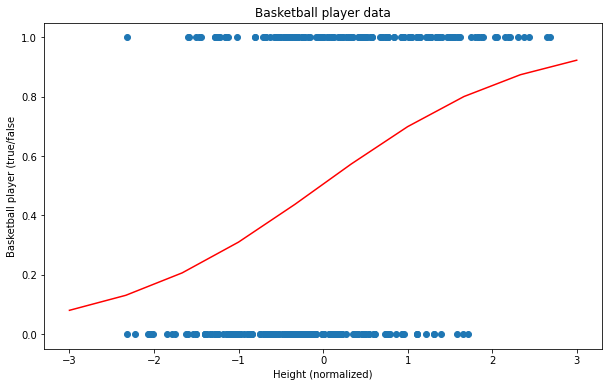

In [116]:
# function plot
import matplotlib.pylab as pylab
x = pylab.linspace(-3, 3,10)
y = pylab.linspace(0,1,10)

f = plt.figure() 
f.set_figwidth(10) 
f.set_figheight(6) 

pylab.plot(x, 1 / (1 + np.exp(-1 * (final_weights[1] * x + final_weights[0]))), 'r', label = ' x linspace(-10,10,10)')
plt.scatter(height_train, basketball_train)
plt.xlabel("Height (normalized)")
plt.ylabel("Basketball player (true/false")
plt.title("Basketball player data")
plt.show()

**3.2:**  Now train the model to be gender dependent by incorporating both the height and female features.  Evaluate on the same test set with average loss and accuracy.

Plot the logistic regression function across heights for male and female. (In other words, you will now plot two sigmoid curves, one for when gender=0, and one for when gender=1.)

Do the learned functions make sense relative to one another? Explain.

In [85]:
female = np.array(basketball_df['female'],dtype='float').reshape(-1,1)

female_train, female_test = train_test_split(female, test_size=0.2, random_state=5)


weights = [1, 1, 1]
learning_rate = 0.01
final_weights=run(weights, [height_train, female_train], basketball_train, learning_rate, total_iterations=100000, iterations_per_report=10000)

[0.99425439 1.0014909  0.99701478]
[-0.59202832  1.20527542  1.20759953]
[-0.59618608  1.20819861  1.21486868]
[-0.59622842  1.20822839  1.2149427 ]
[-0.59622885  1.20822869  1.21494345]
[-0.59622885  1.20822869  1.21494346]
[-0.59622885  1.20822869  1.21494346]
[-0.59622885  1.20822869  1.21494346]
[-0.59622885  1.20822869  1.21494346]
[-0.59622885  1.20822869  1.21494346]
[-0.59622885  1.20822869  1.21494346]


In [64]:
# compute average loss
avgLoss = 0
for i in range(len(height_test)):
  prediction = 1 / (1 + np.exp(-1 * (female_test[i] * final_weights[2] + height_test[i] * final_weights[1] + final_weights[0])))
  target = basketball_test[i]
  avgLoss += np.log(target * prediction + (1 - target) * (1 - prediction))
avgLoss *= -1 / len(height_test)
print("Average loss (height and gender): {}".format(avgLoss))

Average loss: [0.57737803]


In [67]:
# compute accuracy
accuracy = 0
for i in range(len(height_test)):
  prediction = 1 / (1 + np.exp(-1 * (female_test[i] * final_weights[2] + height_test[i] * final_weights[1] + final_weights[0])))
  target = basketball_test[i]
  if abs(target - prediction) < 0.5:
    accuracy += 1
accuracy *= 1 / len(height_test)
print("Accuracy (height and gender): {}".format(accuracy))

Accuracy: 0.7000000000000001


In [ ]:
# function plot
import matplotlib.pylab as pylab
x = pylab.linspace(-3, 3,10)
y = pylab.linspace(0,1,10)

f = plt.figure() 
f.set_figwidth(10) 
f.set_figheight(6) 

pylab.plot(x, 1 / (1 + np.exp(-1 * (final_weights[1] * x + final_weights[0]))), 'r', label = ' x linspace(-10,10,10)')
plt.scatter(height_train, basketball_train)
plt.xlabel("Height (normalized)")
plt.ylabel("Basketball player (true/false")
plt.title("Basketball player data")
plt.show()

In [69]:
# determines sigmoid functions only for males and females respectively
basketball_all = np.array(basketball_df,dtype='float')
basketball_all
males = basketball_all[basketball_all[:,2] == 0]
females = basketball_all[basketball_all[:,2] == 1]

male_height = males[:,0]
male_height_norm = (male_height-np.mean(male_height))/np.std(male_height)

female_height = females[:,0]
female_height_norm = (female_height-np.mean(female_height))/np.std(female_height)

weights = [1, 1]
learning_rate = 0.001
final_male_weights=run(weights, [male_height_norm], males[:,3], learning_rate, total_iterations=100000, iterations_per_report=10000)
                       
weights = [1, 1]
learning_rate = 0.001
final_female_weights=run(weights, [female_height_norm], females[:,3], learning_rate, total_iterations=100000, iterations_per_report=10000)

[0.9996089  1.00012519]
[0.02953351 1.21793517]
[0.00949884 1.22279366]
[0.00907679 1.22312165]
[0.00906871 1.2231475 ]
[0.00906862 1.22314963]
[0.00906863 1.22314981]
[0.00906863 1.22314982]
[0.00906863 1.22314983]
[0.00906863 1.22314983]
[0.00906863 1.22314983]
[0.99960871 1.00001031]
[0.02029759 0.84238276]
[0.00544744 0.82972552]
[0.00523374 0.82925018]
[0.00523025 0.82923298]
[0.00523017 0.82923236]
[0.00523017 0.82923234]
[0.00523017 0.82923234]
[0.00523017 0.82923234]
[0.00523017 0.82923234]
[0.00523017 0.82923234]


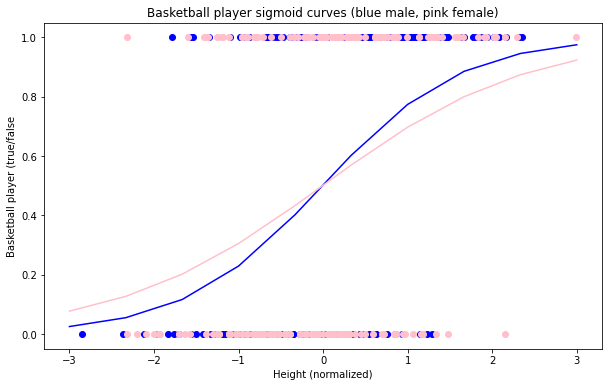

In [66]:
# function plot
import matplotlib.pylab as pylab
x = pylab.linspace(-3, 3,10)
y = pylab.linspace(0,1,10)

f = plt.figure() 
f.set_figwidth(10) 
f.set_figheight(6) 

pylab.plot(x, 1 / (1 + np.exp(-1 * (final_male_weights[1] * x + final_male_weights[0]))), 'r', label = ' x linspace(-10,10,10)', color = 'blue')
pylab.plot(x, 1 / (1 + np.exp(-1 * (final_female_weights[1] * x + final_female_weights[0]))), 'r', label = ' x linspace(-10,10,10)', color = 'pink')
plt.scatter(male_height_norm, males[:,3], color = 'blue')
plt.scatter(female_height_norm, females[:,3], color = 'pink')
plt.xlabel("Height (normalized)")
plt.ylabel("Basketball player (true/false")
plt.title("Basketball player sigmoid curves (blue male, pink female)")
plt.show()

The sigmoid curves for the male and female characters are fairly similar, except the male curve is somewhat steeper. This difference means that these learned functions make a reasonable amount of sense relative to one another.

**3.3:** Incorporate the weight feature (training (height, weight) and (height, weight, gender)). Evaluate on average loss and accuracy.  Does weight help as a feature?

In [82]:
# height and weight
# weight is not to be confused with "weights", the weights used for the logistic regression
weight = np.array(basketball_df['weight'],dtype='float').reshape(-1,1)

weight_norm = (weight-np.mean(weight))/np.std(weight)

weight_train, weight_test = train_test_split(weight_norm, test_size=0.2, random_state=5)

weights = [1, 1, 1]
learning_rate = 0.01
final_weights=run(weights, [height_train, weight_train], basketball_train, learning_rate, total_iterations=100000, iterations_per_report=10000)

[0.99713434 0.99835971 0.99945067]
[-0.05941032 -1.00240748  2.22515275]
[-0.06692171 -1.08724578  2.32475961]
[-0.06750047 -1.09366627  2.33232159]
[-0.06754521 -1.094162    2.33290559]
[-0.06754867 -1.09420033  2.33295075]
[-0.06754894 -1.0942033   2.33295424]
[-0.06754896 -1.09420352  2.33295451]
[-0.06754896 -1.09420354  2.33295453]
[-0.06754896 -1.09420354  2.33295453]
[-0.06754896 -1.09420354  2.33295453]


In [83]:
# compute average loss
avgLoss = 0
for i in range(len(height_test)):
  prediction = 1 / (1 + np.exp(-1 * (weight_test[i] * final_weights[2] + height_test[i] * final_weights[1] + final_weights[0])))
  target = basketball_test[i]
  avgLoss += np.log(target * prediction + (1 - target) * (1 - prediction))
avgLoss *= -1 / len(height_test)
print("Average loss (height and weight): {}".format(avgLoss))
# compute accuracy
accuracy = 0
for i in range(len(height_test)):
  prediction = 1 / (1 + np.exp(-1 * (weight_test[i] * final_weights[2] + height_test[i] * final_weights[1] + final_weights[0])))
  target = basketball_test[i]
  if abs(target - prediction) < 0.5:
    accuracy += 1
accuracy *= 1 / len(height_test)
print("Accuracy (height and weight): {}".format(accuracy))

Average loss (height and weight): [0.55248317]
Accuracy (height and weight): 0.7000000000000001


In [86]:
# height, weight, and gender

weights = [1, 1, 1, 1]
learning_rate = 0.01
final_weights=run(weights, [height_train, weight_train, female_train], basketball_train, learning_rate, total_iterations=100000, iterations_per_report=10000)

[0.99540863 0.9995148  1.00033278 0.99806981]
[-0.59590089 -0.61499401  2.14997449  1.03448229]
[-0.59358034 -0.70728792  2.25030224  1.01613091]
[-0.59307515 -0.71603692  2.25963987  1.01392583]
[-0.59302407 -0.71687598  2.26053378  1.01371009]
[-0.59301915 -0.71695653  2.26061959  1.01368933]
[-0.59301867 -0.71696427  2.26062782  1.01368734]
[-0.59301863 -0.71696501  2.26062861  1.01368715]
[-0.59301862 -0.71696508  2.26062869  1.01368713]
[-0.59301862 -0.71696509  2.2606287   1.01368713]
[-0.59301862 -0.71696509  2.2606287   1.01368713]


In [87]:
# compute average loss
avgLoss = 0
for i in range(len(height_test)):
  prediction = 1 / (1 + np.exp(-1 * (female_test[i] * final_weights[3] +
                                     weight_test[i] * final_weights[2] + height_test[i] * final_weights[1] + final_weights[0])))
  target = basketball_test[i]
  avgLoss += np.log(target * prediction + (1 - target) * (1 - prediction))
avgLoss *= -1 / len(height_test)
print("Average loss (height, weight, and gender): {}".format(avgLoss))
# compute accuracy
accuracy = 0
for i in range(len(height_test)):
  prediction = 1 / (1 + np.exp(-1 * (female_test[i] * final_weights[3] +
                                     weight_test[i] * final_weights[2] + height_test[i] * final_weights[1] + final_weights[0])))
  target = basketball_test[i]
  if abs(target - prediction) < 0.5:
    accuracy += 1
accuracy *= 1 / len(height_test)
print("Accuracy (height, weight, and gender): {}".format(accuracy))

Average loss (height and weight): [0.51937899]
Accuracy (height and weight): 0.7625000000000001


Weight helps slightly as a feature, about as much as gender does. However, the three-way combination of height, weight, and gender produces better results than just height and weight or height and gender.

---
---

**Submission:**

All code must be written in Python. Submit all files needed for the TA to grade.  You can choose one of two methods:

* iPython notebook: you can document your code and provide the written answers within the iPython notebook.  Please indicate your name at the top.  Also, if you are using Google Colab (or other online iPython notebook services), please download submit the ipynb file. (*Do not submit a link to the file.*)

* Zip archive: make sure to include both your writeup and the code, as well as instructions on how to execute the code. (Ideally, we would prefer that you ensure your code can run on the CSE stdlinux.cse.ohio-state.edu system, and your instructions are tailored to getting it running on said system. In general please avoid using any packages other than those mentioned in the lab itself and try not to do anything too tricky or unusual with regards to running your code.)

You may ask colleagues for general understanding assistance but do not share code.  You may start, however, from the hands-on code as a jumping off point.  Please do not copy code from the internet in developing your answer.